In [1]:
import pandas as pd
import sys
sys.path.append('../src')

# Load Cleaned Data
df_dep = pd.read_csv('../data/processed/dependency_ratio.csv')
df_health = pd.read_csv('../data/processed/health_expenditure_long.csv')
df_rd = pd.read_csv('../data/processed/rd_expenditure_long.csv') 
df_contr = pd.read_csv('../data/processed/contribution_revenue_long.csv')
df_gdp = pd.read_csv('../data/processed/GDP_percapita_clean.csv')
df_edu = pd.read_csv('../data/processed/Education_perGDP_clean.csv')

**Merge_All Data**

In [3]:
# Merge
merged = df_dep.merge(df_health, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_edu, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_rd, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_contr, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_gdp, on=["ISO3", "Year", "Country"], how="outer")

# Save merged_all_data
merged.to_csv('../data/processed/merged_all_data.csv', index=False)
# Show
merged.head()

,Country,ISO3,Year,Dependency_Ratio,Health_Expenditure,Education_perGDP,RD_Expenditure,Contribution_revenue,GDP_percapita
0,Andorra,AND,2000,38.260924,5.952764,NaN,NaN,NaN,21810.248743
1,Andorra,AND,2001,38.989848,5.858237,NaN,NaN,NaN,23511.295148
2,Andorra,AND,2002,39.556404,5.996212,1.65971,NaN,NaN,26528.130158
3,Andorra,AND,2003,38.880339,5.547715,NaN,NaN,NaN,34063.578403
4,Andorra,AND,2004,37.326780,5.288469,1.54412,NaN,NaN,39021.127810


<Axes: >

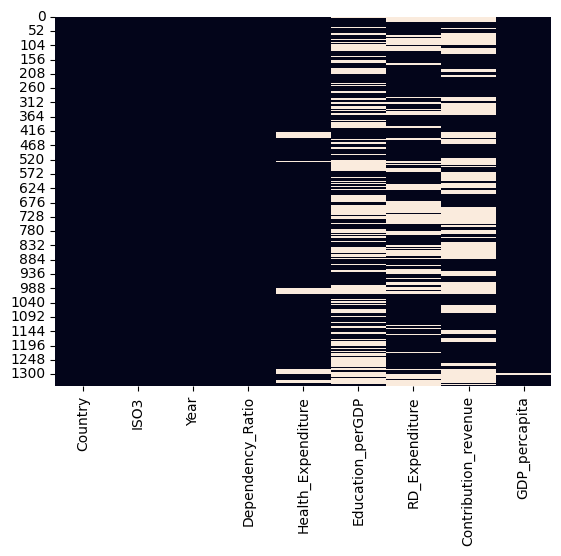

In [4]:
# Show missing in heatmap
import seaborn as sns
sns.heatmap(merged.isna(), cbar=False)

**Merged (drop all NaNs)**

In [5]:
# Drop missing value
merged_clean = merged.dropna()
# Save merge_clean
merged_clean.to_csv('../data/interim/merged_no_NaN.csv', index=False)
# show
merged_clean.head()

,Country,ISO3,Year,Dependency_Ratio,Health_Expenditure,Education_perGDP,RD_Expenditure,Contribution_revenue,GDP_percapita
21,Argentina,ARG,2000,60.839942,8.220011,4.58031,0.43884,23.422256,7637.014892
22,Argentina,ARG,2001,60.442089,8.371799,4.83374,0.42461,22.840272,7141.475077
23,Argentina,ARG,2002,60.010018,7.393312,4.01734,0.38886,19.678291,2569.699635
24,Argentina,ARG,2003,59.515772,6.894516,3.53505,0.41013,16.228057,3320.477751
25,Argentina,ARG,2004,58.990881,7.228683,3.48652,0.40376,16.555761,4242.020991


**Merged (only drop NaN in selected vars)**

In [6]:
# Specific variable
main_cols = ["Health_Expenditure", "Dependency_Ratio", "GDP_percapita", "RD_Expenditure"]
# Drop rows where any of these are missing, but keep the full dataset
merged_clean_some = merged.dropna(subset=main_cols)
#save merge_clean_some
merged_clean_some.to_csv('../data/interim/merged_some_NaN.csv', index=False)
# show
merged_clean_some.head()

,Country,ISO3,Year,Dependency_Ratio,Health_Expenditure,Education_perGDP,RD_Expenditure,Contribution_revenue,GDP_percapita
21,Argentina,ARG,2000,60.839942,8.220011,4.58031,0.43884,23.422256,7637.014892
22,Argentina,ARG,2001,60.442089,8.371799,4.83374,0.42461,22.840272,7141.475077
23,Argentina,ARG,2002,60.010018,7.393312,4.01734,0.38886,19.678291,2569.699635
24,Argentina,ARG,2003,59.515772,6.894516,3.53505,0.41013,16.228057,3320.477751
25,Argentina,ARG,2004,58.990881,7.228683,3.48652,0.40376,16.555761,4242.020991


In [7]:
# Asses observations
print("Merged (All):", merged.shape[0])
print("Merged (only drop NaN in selected vars):", merged_clean_some.shape[0])
print("Merged (drop all NaNs):", merged_clean.shape[0])

Merged (All): 1344
Merged (only drop NaN in selected vars): 887
Merged (drop all NaNs): 384


In [8]:
# How many countries and years?
print("Countries in merged (All):", merged['ISO3'].nunique())
print("Years in merged (All):", merged['Year'].nunique())
print("Countries in merged (only drop NaN in selected vars):", merged_clean_some['ISO3'].nunique())
print("Years in merged (only drop NaN in selected vars):", merged_clean_some['Year'].nunique())
print("Countries in merged (drop all Nans):", merged_clean['ISO3'].nunique())
print("Years in merged (drop all NaNs):", merged_clean['Year'].nunique())


Countries in merged (All): 64
Years in merged (All): 21
Countries in merged (only drop NaN in selected vars): 55
Years in merged (only drop NaN in selected vars): 21
Countries in merged (drop all Nans): 38
Years in merged (drop all NaNs): 20
